### PCA Practices

1. 基于 iris_data.csv 数据，建立 KNN 模型实现数据分类 (n_neighbors = 3)
2. 对数据进行标准化处理，选取一个维度可视化处理后效果预览。
3. 进行与原数据等维度 PCA, 查看各主成分的方差比例。
4. 保留合适的主成分，可视化降维后的数据。
5. 基于降维后的数据建立 KNN 模型，与原数据表现进行对比。

In [3]:
# Load data
import pandas as pd
import numpy as np
data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [4]:
# Define X and y
X = data.drop(['target', 'label'], axis = 1)
y = data.loc[:, 'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X, y)
y_predict = KNN.predict(X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


In [10]:
# Fit transofrm
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
print(X_norm)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [14]:
# Calculate the mean and sigma
x1_mean = X.loc[:, 'sepal length'].mean()
x1_norm_mean = X_norm[:, 0].mean()
x1_sigma = X.loc[:, 'sepal length'].std()
x1_norm_sigma = X_norm[:, 0].std()
print(x1_mean, x1_sigma, x1_norm_mean, x1_norm_sigma)

5.843333333333334 0.8280661279778629 -4.736951571734001e-16 1.0


/opt/homebrew/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


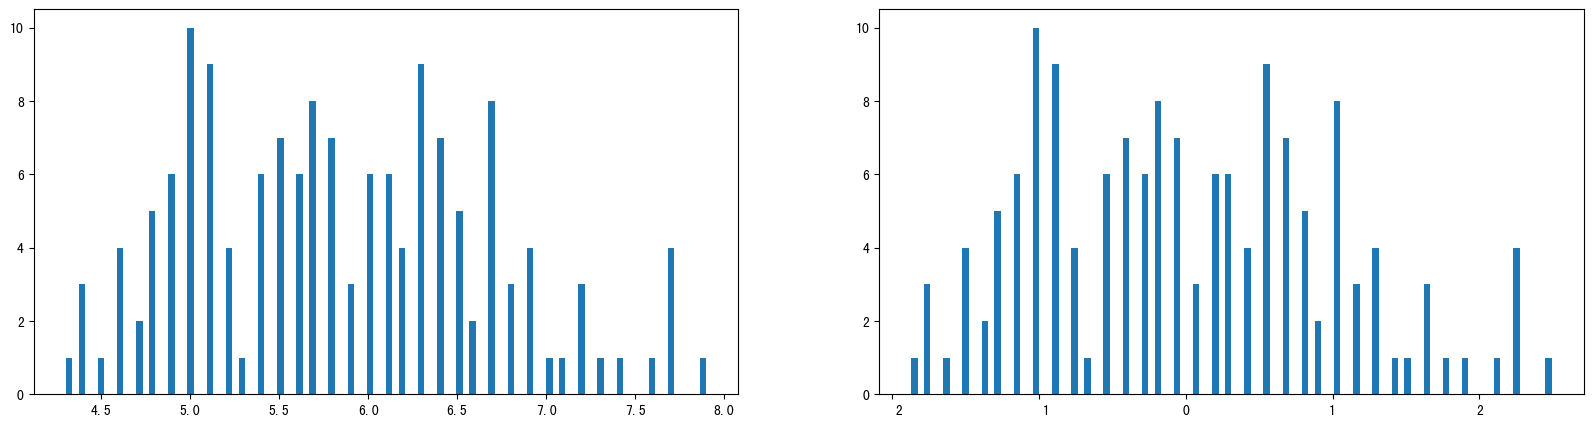

In [17]:
# visualization the data 
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(X.loc[:, 'sepal length'], bins = 100)
plt.subplot(122)
plt.hist(X_norm[:, 0], bins = 100)
plt.show()

In [19]:
print(X.shape)

(150, 4)


In [24]:
# PCA analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_ca = pca.fit_transform(X_norm)
# Calculate the variance ration of each principle components
var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72770452 0.23030523 0.03683832 0.00515193]


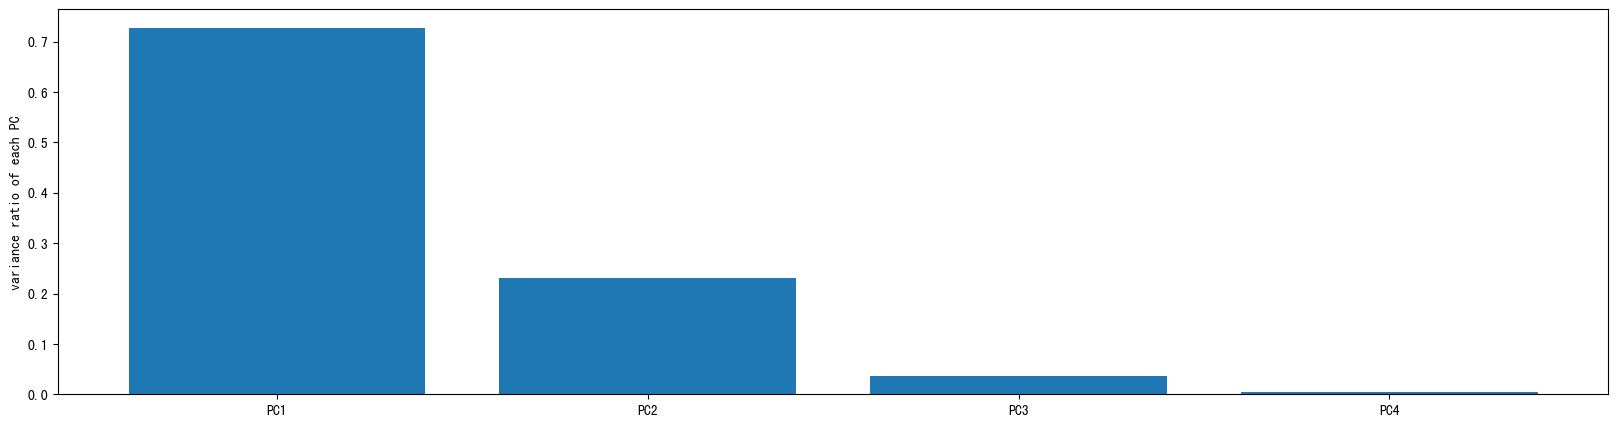

In [26]:
fig2 = plt.figure(figsize = (20, 5))
plt.bar([1, 2, 3, 4],var_ratio)
plt.xticks([1, 2, 3, 4], ['PC1', 'PC2', 'PC3', 'PC4'])
plt.ylabel('variance ratio of each PC')
plt.show()

In [31]:
# Will be select PC1 and PC2 because vlaue is two hight
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)
X_pca.shape

(150, 2)

In [40]:
type(X_pca)

[[-2.26454173e+00  5.05703903e-01]
 [-2.08642550e+00 -6.55404729e-01]
 [-2.36795045e+00 -3.18477311e-01]
 [-2.30419716e+00 -5.75367713e-01]
 [-2.38877749e+00  6.74767397e-01]
 [-2.07053681e+00  1.51854856e+00]
 [-2.44571134e+00  7.45626750e-02]
 [-2.23384186e+00  2.47613932e-01]
 [-2.34195768e+00 -1.09514636e+00]
 [-2.18867576e+00 -4.48629048e-01]
 [-2.16348656e+00  1.07059558e+00]
 [-2.32737775e+00  1.58587455e-01]
 [-2.22408272e+00 -7.09118158e-01]
 [-2.63971626e+00 -9.38281982e-01]
 [-2.19229151e+00  1.88997851e+00]
 [-2.25146521e+00  2.72237108e+00]
 [-2.20275048e+00  1.51375028e+00]
 [-2.19017916e+00  5.14304308e-01]
 [-1.89407429e+00  1.43111071e+00]
 [-2.33994907e+00  1.15803343e+00]
 [-1.91455639e+00  4.30465163e-01]
 [-2.20464540e+00  9.52457317e-01]
 [-2.77416979e+00  4.89517027e-01]
 [-1.82041156e+00  1.06750793e-01]
 [-2.22821750e+00  1.62186163e-01]
 [-1.95702401e+00 -6.07892567e-01]
 [-2.05206331e+00  2.66014312e-01]
 [-2.16819365e+00  5.52016495e-01]
 [-2.14030596e+00  3

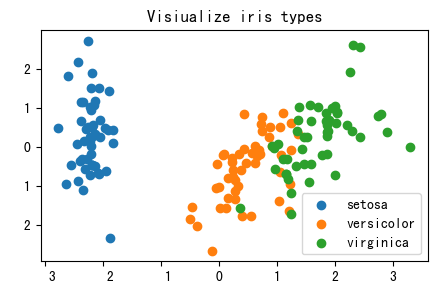

In [42]:
# Visualize the PCA result
fig3 = plt.figure(figsize=(5, 3))
setosa = plt.scatter(X_pca[:, 0][y == 0], X_pca[:, 1][y == 0])
versicolor = plt.scatter(X_pca[:, 0][y == 1], X_pca[:, 1][y == 1])
virginica = plt.scatter(X_pca[:, 0][y == 2], X_pca[:, 1][y == 2])
plt.title('Visiualize iris types')
plt.legend((setosa, versicolor, virginica), ('setosa', 'versicolor', 'virginica'))

In [45]:
# Save to image
fig3.savefig('iris_type.png')

/var/folders/ql/y3m1vwns27qdfzv3sd7yc9hr0000gn/T/ipykernel_24401/3960225962.py:2: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig3.savefig('iris_type.png')


In [46]:
# Data dimensionality reduction accuracy predict
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_pca, y)
y_predict = KNN.predict(X_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.9466666666666667


### PCA Practices Summary:
1. 通过计算数据对应的主成分 (principle components)，可在减少数据维度同时尽可能保留主要信息。
2. 确定合适的主成分维度，可先对数据进行原数据相同维度的 PCA 处理。再根据各个成分的数据方差确认主要成分维度。
3. 核心算法参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA